In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import sklearn.metrics

In [2]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\autos.csv")

In [3]:
df.head(2)

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [5]:
df.isnull().sum()*100/len(df)

index                   0.000000
dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64

In [6]:
df.dtypes

index                   int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [7]:
#df[''].unique()

In [8]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [9]:
df.rename(columns = {'index':'Index', 'dateCrawled':'DateCrawled', 'name':'Name', 'seller':'Seller', 'offerType':'OfferType', 'price':'Price',
       'abtest':'Abtest', 'vehicleType':'VehicleType', 'yearOfRegistration':'YearofRegistration', 'gearbox':'Gearbox', 'powerPS':'PowerPS',
       'model':'Model', 'kilometer':'Kilometer', 'monthOfRegistration':'MonthofRegistration', 'fuelType':'FuelType', 'brand':'Brand', 'notRepairedDamage':'Notrepaireddamage',
       'dateCreated':'DateCreated', 'nrOfPictures':'Nrofpictures', 'postalCode':'PostalCode', 'lastSeen':'LastSeen'}, inplace = True)

In [10]:
df.columns

Index(['Index', 'DateCrawled', 'Name', 'Seller', 'OfferType', 'Price',
       'Abtest', 'VehicleType', 'YearofRegistration', 'Gearbox', 'PowerPS',
       'Model', 'Kilometer', 'MonthofRegistration', 'FuelType', 'Brand',
       'Notrepaireddamage', 'DateCreated', 'Nrofpictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [11]:
df.drop(columns = ['Name', 'Seller', 'OfferType', 'Index', 'Nrofpictures', 'PostalCode', 'YearofRegistration', 'Notrepaireddamage', 'LastSeen', 'DateCrawled', 'MonthofRegistration'], inplace = True)

In [12]:
df

,Price,Abtest,VehicleType,Gearbox,PowerPS,Model,Kilometer,FuelType,Brand,DateCreated
0,480,test,NaN,manuell,0,golf,150000,benzin,volkswagen,2016-03-24 00:00:00
1,18300,test,coupe,manuell,190,NaN,125000,diesel,audi,2016-03-24 00:00:00
2,9800,test,suv,automatik,163,grand,125000,diesel,jeep,2016-03-14 00:00:00
3,1500,test,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,2016-03-17 00:00:00
4,3600,test,kleinwagen,manuell,69,fabia,90000,diesel,skoda,2016-03-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,NaN,0,NaN,20000,NaN,sonstige_autos,2016-03-14 00:00:00
371524,1199,test,cabrio,automatik,101,fortwo,125000,benzin,smart,2016-03-05 00:00:00
371525,9200,test,bus,manuell,102,transporter,150000,diesel,volkswagen,2016-03-19 00:00:00
371526,3400,test,kombi,manuell,100,golf,150000,diesel,volkswagen,2016-03-20 00:00:00


In [13]:
df.duplicated().sum()

13976

In [14]:
df.drop_duplicates(inplace = True, keep = 'first')

In [15]:
df.duplicated().sum()

0

In [16]:
df["VehicleType"] = df["VehicleType"].fillna(df["VehicleType"].mode()[0])

In [17]:
df["Gearbox"] = df["Gearbox"].fillna(df["Gearbox"].mode()[0])

In [18]:
df["FuelType"] = df["FuelType"].fillna(df["FuelType"].mode()[0])

In [19]:
df["Model"] = df["Model"].fillna(df["Model"].mode()[0])

In [20]:
df.isnull().sum()*100/len(df)

Price          0.0
Abtest         0.0
VehicleType    0.0
Gearbox        0.0
PowerPS        0.0
Model          0.0
Kilometer      0.0
FuelType       0.0
Brand          0.0
DateCreated    0.0
dtype: float64

In [21]:
df['DateCreated'] = df['DateCreated'].str.split(' ').str[0]

In [22]:
df["DateCreated"] = pd.to_datetime(df["DateCreated"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357552 entries, 0 to 371527
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Price        357552 non-null  int64         
 1   Abtest       357552 non-null  object        
 2   VehicleType  357552 non-null  object        
 3   Gearbox      357552 non-null  object        
 4   PowerPS      357552 non-null  int64         
 5   Model        357552 non-null  object        
 6   Kilometer    357552 non-null  int64         
 7   FuelType     357552 non-null  object        
 8   Brand        357552 non-null  object        
 9   DateCreated  357552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 30.0+ MB


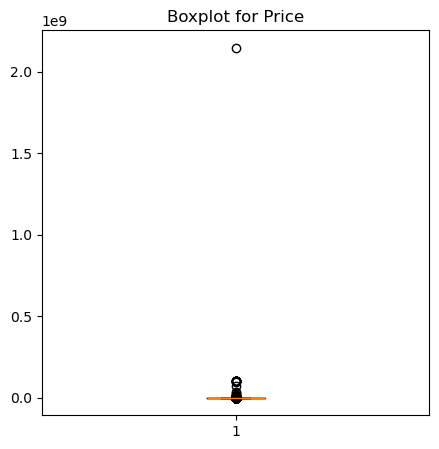

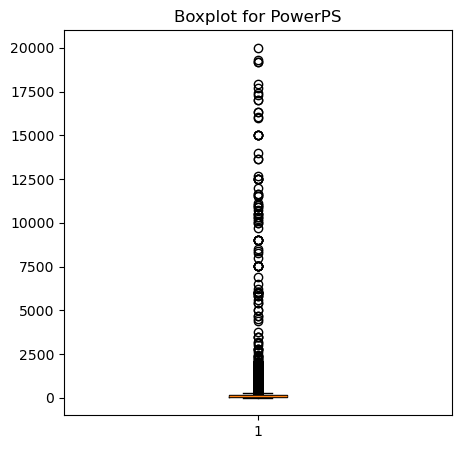

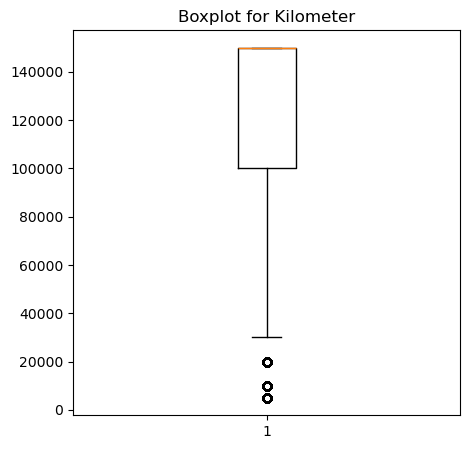

In [24]:
for col in df.select_dtypes(include = 'number'):
    plt.figure(figsize = (5,5))
    plt.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [25]:
def remove_outliers(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return df[(df[col]>=lower) & (df[col]<=upper)]

In [26]:
df = remove_outliers(df, 'PowerPS')

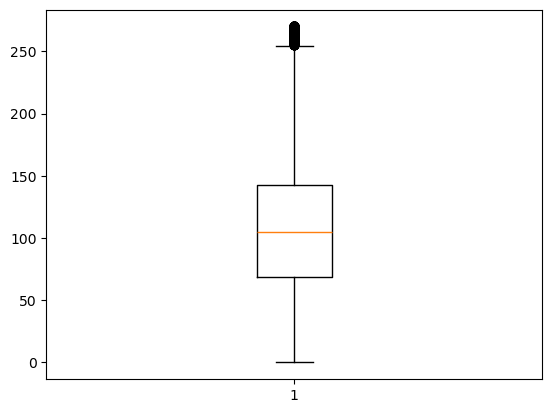

In [27]:
plt.boxplot(df['PowerPS'])
plt.show()

In [28]:
df = remove_outliers(df, 'Price')

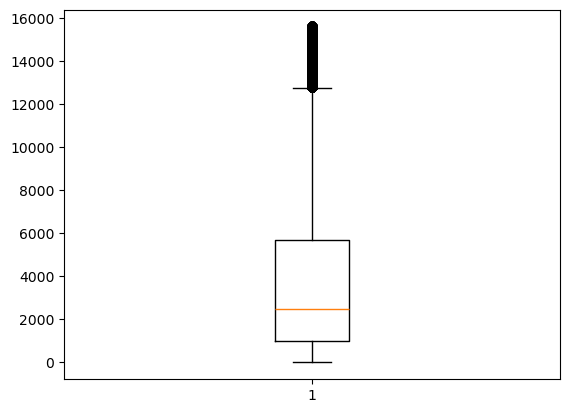

In [29]:
plt.boxplot(df['Price'])
plt.show()

In [30]:
df = remove_outliers(df, 'Kilometer')

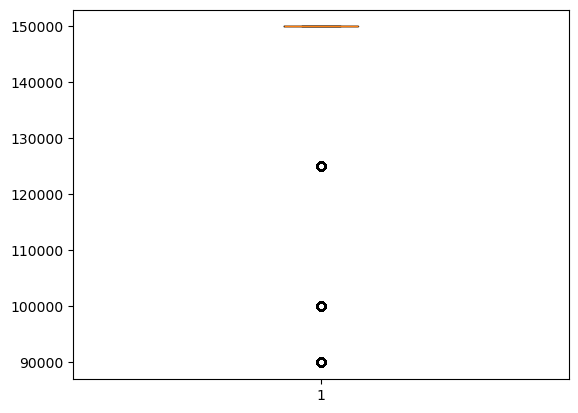

In [31]:
plt.boxplot(df['Kilometer'])
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


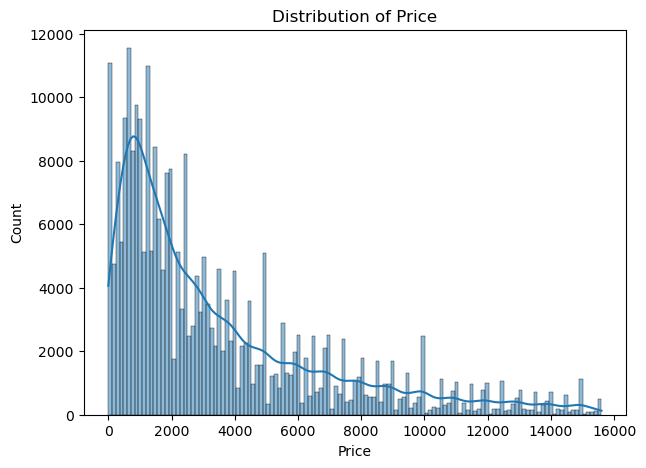

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


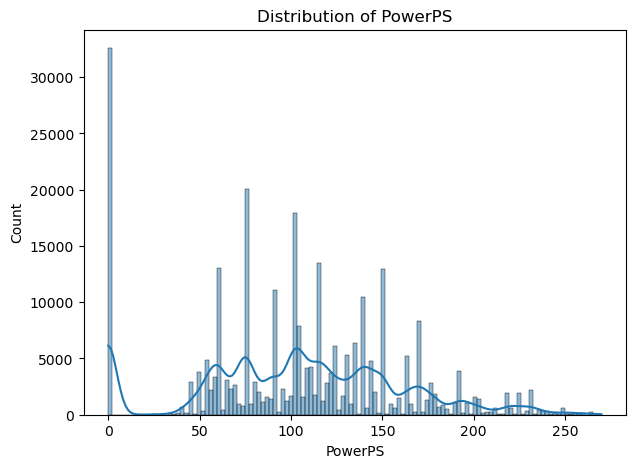

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


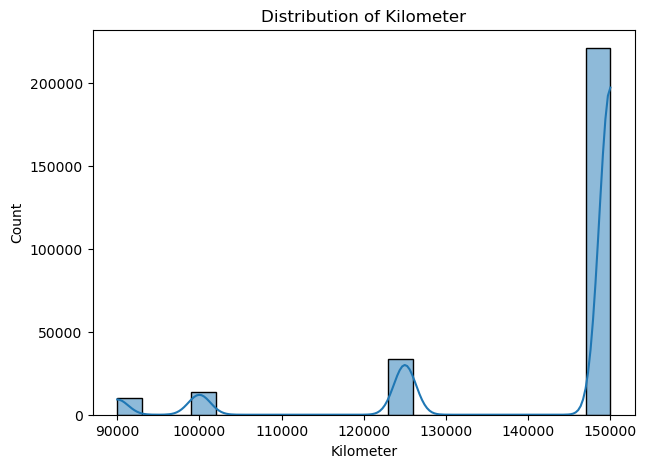

In [32]:
for col in df.select_dtypes('number'):
    plt.figure(figsize = (7,5))
    sns.histplot(df[col], kde =  True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278116 entries, 0 to 371526
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Price        278116 non-null  int64         
 1   Abtest       278116 non-null  object        
 2   VehicleType  278116 non-null  object        
 3   Gearbox      278116 non-null  object        
 4   PowerPS      278116 non-null  int64         
 5   Model        278116 non-null  object        
 6   Kilometer    278116 non-null  int64         
 7   FuelType     278116 non-null  object        
 8   Brand        278116 non-null  object        
 9   DateCreated  278116 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 23.3+ MB


In [34]:
X = df.drop(columns = 'Price')
y = df['Price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 56)

In [36]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(include='number').columns

In [37]:
cat_features_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [38]:
num_features_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])    

In [39]:
transformer = ColumnTransformer([
    ('cat_features', cat_features_pipeline, cat_features),
    ('num_features', num_features_pipeline, num_features)
])

In [40]:
pipeline = Pipeline([
    ('transformer', transformer),
    ('rf_model', RandomForestRegressor())
])

In [41]:
rf_model = pipeline.fit(X_train, y_train)

In [42]:
 rf_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Abtest', 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand'], dtype='object')),
                                                 ('num_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PowerPS', 'Kilometer'], dtype='object'))])),
                ('rf_model', RandomForestRegressor())])

In [44]:
y_pred = rf_model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [46]:
print(f"mse: {mse:2f}, mae: {mae:2f}, r_square: {r_squared:2f}")

mse: 3487576.187082, mae: 1218.182204, r_square: 0.694528


In [52]:
import pickle

In [53]:
with open("Car_Modelling_randomforestregressor_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)